In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from python_files.constants import PARTICIPANTS

In [2]:
df = pd.read_csv('./data/analysis/chat.csv', index_col=0)
df["datetime"] = pd.to_datetime(df["datetime"])
df

,datetime,participant,type,message,edited,calls_meta,deleted,view_once
0,2024-02-16 20:13:00,Mariana,message,Oigan,False,False,False,False
1,2024-02-16 20:13:00,Mariana,message,Vengan a mi U,False,False,False,False
2,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
3,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
4,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
...,...,...,...,...,...,...,...,...
59100,2025-02-23 09:05:00,Mariana,message,"No, hinchazón",False,False,False,False
59101,2025-02-23 09:06:00,Mariana,message,Wow,False,False,False,False
59102,2025-02-23 09:06:00,Mariana,message,Buenos días,False,False,False,False
59103,2025-02-23 10:01:00,JuanD,message,Buenos días,False,False,False,False


In [3]:
total_df = df.groupby("datetime").sum().reset_index()[["datetime", "edited", "calls_meta", "deleted", "view_once"]]
total_df

,datetime,edited,calls_meta,deleted,view_once
0,2024-02-16 20:13:00,0,0,0,0
1,2024-02-16 20:14:00,1,0,0,0
2,2024-02-16 20:15:00,0,0,0,0
3,2024-02-16 20:18:00,1,0,0,0
4,2024-02-16 20:19:00,0,0,0,0
...,...,...,...,...,...
19036,2025-02-23 08:48:00,0,0,0,0
19037,2025-02-23 09:05:00,0,0,0,0
19038,2025-02-23 09:06:00,0,0,0,0
19039,2025-02-23 10:01:00,0,0,0,0


In [4]:
participant_df = df.groupby(["datetime", "participant"]).sum().reset_index()[
        ["datetime", "participant", "edited", "calls_meta", "deleted", "view_once"]
    ]
participant_df

,datetime,participant,edited,calls_meta,deleted,view_once
0,2024-02-16 20:13:00,Mariana,0,0,0,0
1,2024-02-16 20:13:00,Negron,0,0,0,0
2,2024-02-16 20:14:00,Hombre Religioso,1,0,0,0
3,2024-02-16 20:15:00,Mariana,0,0,0,0
4,2024-02-16 20:18:00,JuanD,1,0,0,0
...,...,...,...,...,...,...
29343,2025-02-23 08:48:00,Alana,0,0,0,0
29344,2025-02-23 09:05:00,Mariana,0,0,0,0
29345,2025-02-23 09:06:00,Mariana,0,0,0,0
29346,2025-02-23 10:01:00,JuanD,0,0,0,0


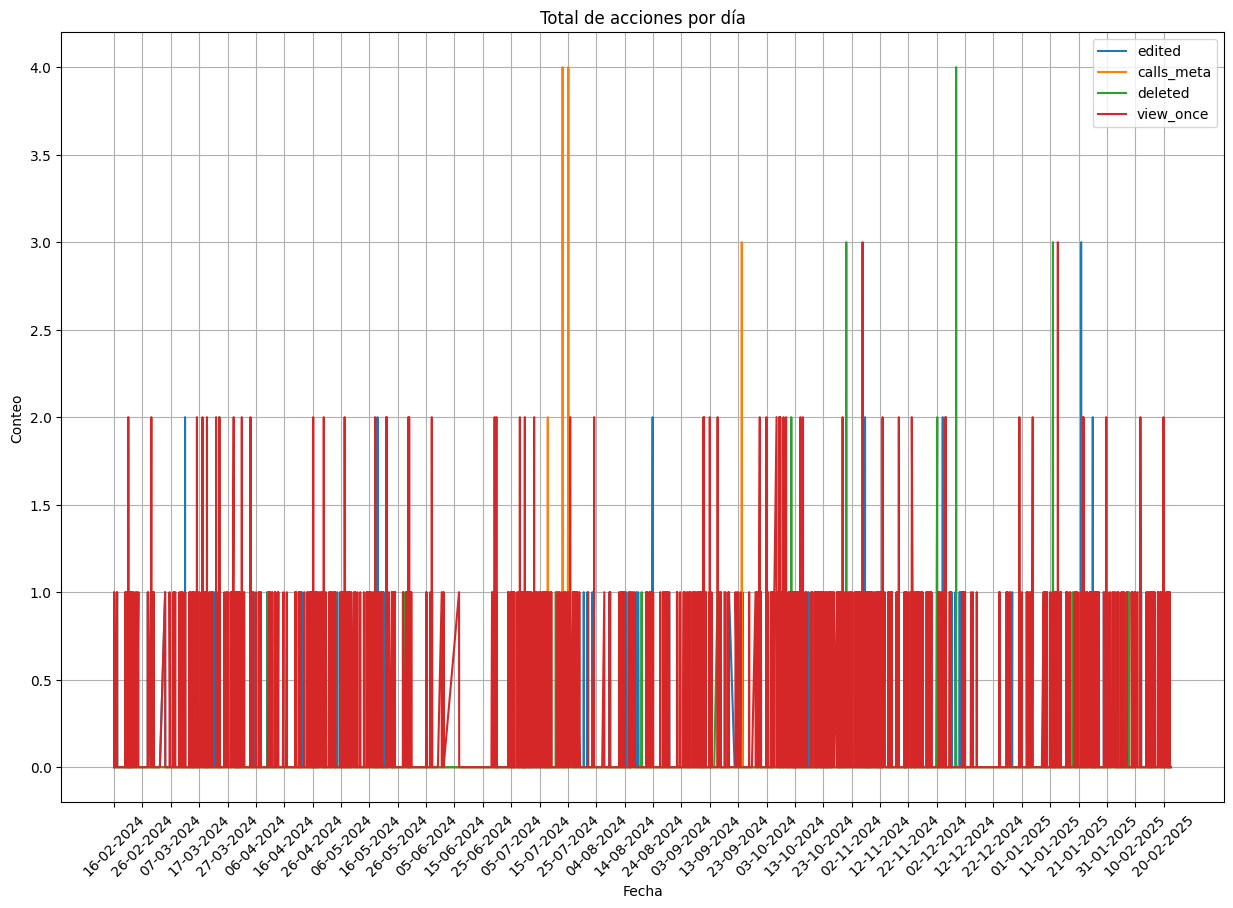

In [5]:
xticks = pd.date_range(start=total_df["datetime"].min(), end=total_df["datetime"].max(), freq="10D")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.lineplot(data=total_df, x="datetime", y="edited", ax=ax, label="edited")
sns.lineplot(data=total_df, x="datetime", y="calls_meta", ax=ax, label="calls_meta")
sns.lineplot(data=total_df, x="datetime", y="deleted", ax=ax, label="deleted")
sns.lineplot(data=total_df, x="datetime", y="view_once", ax=ax, label="view_once")

ax.set(ylabel="Conteo", xlabel="Fecha", title="Total de acciones por día")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime("%d-%m-%Y"), rotation=45)

ax.grid()
plt.show()

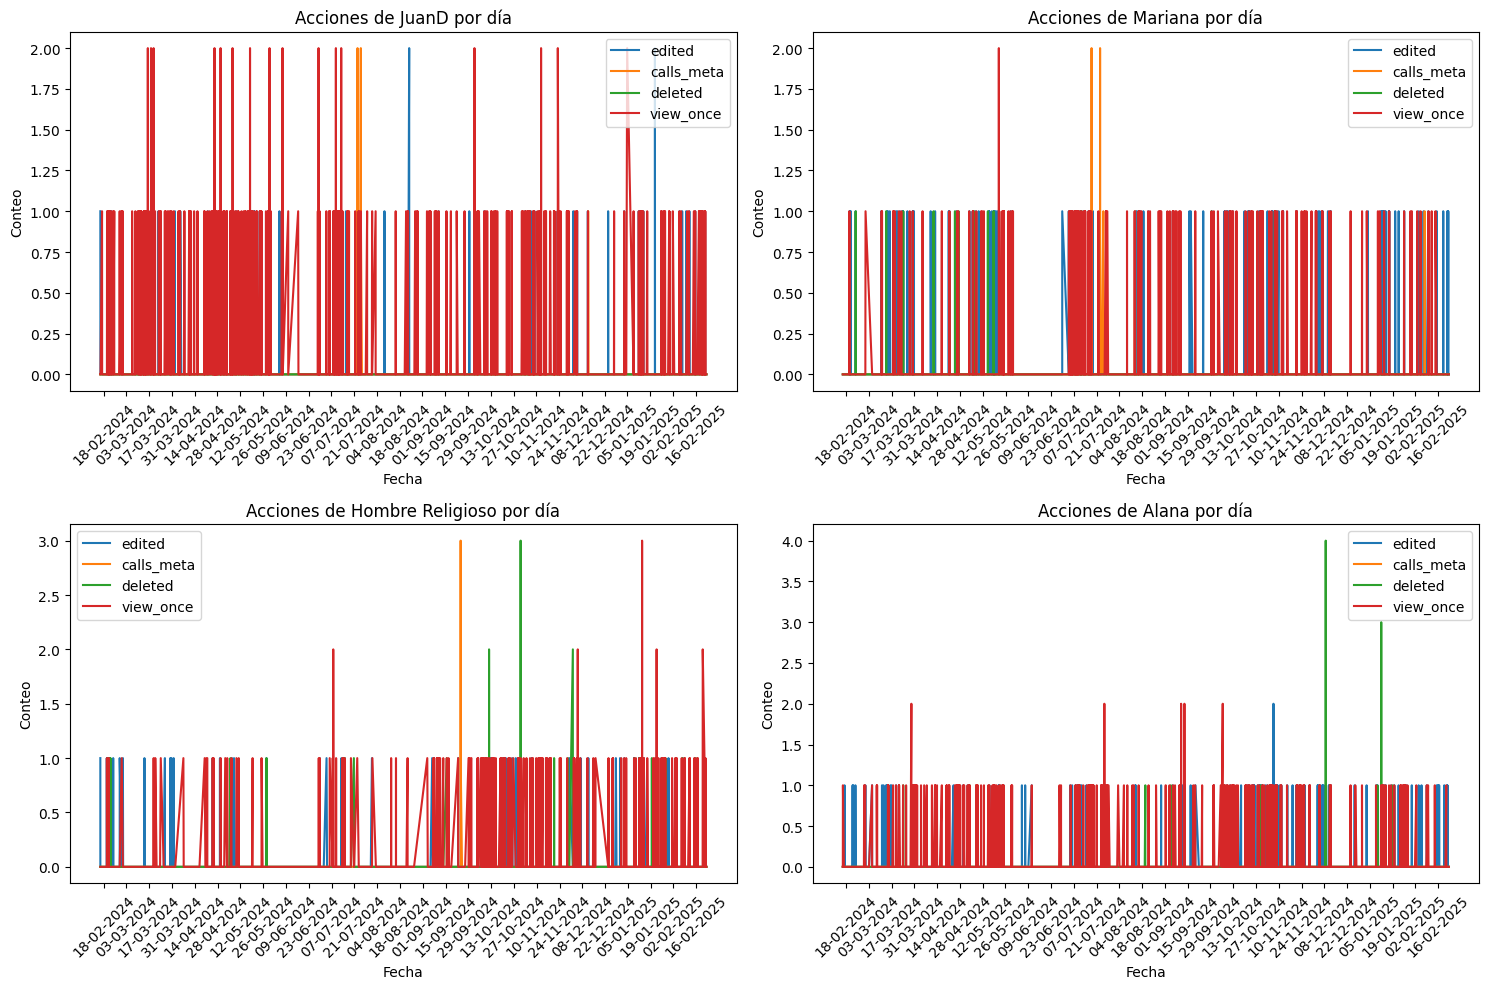

In [6]:
xticks = pd.date_range(start=total_df["datetime"].min(), end=total_df["datetime"].max(), freq="2W")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for participant, ax  in zip(PARTICIPANTS, axes.flatten()):
    for action in ["edited", "calls_meta", "deleted", "view_once"]:
        sns.lineplot(data=participant_df[participant_df["participant"] == participant], x="datetime", y=action, ax=ax, label=action)
        ax.set(ylabel="Conteo", xlabel="Fecha", title=f"Acciones de {participant} por día")
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.strftime("%d-%m-%Y"), rotation=45)

fig.tight_layout()
plt.show()

In [25]:
# General
cond = (df["type"] == "message") | (df["type"].isna())

count_messages = df[cond].shape[0]
for action in ("edited", "calls_meta", "deleted", "view_once"):
    count_action = df[df[action] == True].shape[0]
    print(f"Se realizaron {count_action} de \"{action}\" de un total de {count_messages} mensajes =>", end=" ")
    print(f"{count_action / count_messages:%}")
print()

# Por participante
for participant in PARTICIPANTS:
    count_messages_participant = df[(df["participant"] == participant) & cond].shape[0]
    for action in ("edited", "calls_meta", "deleted", "view_once"):
        count_action_participant = df[(df["participant"] == participant) & (df[action] == True)].shape[0]
        print(f"{participant} realizó {count_action_participant} de \"{action}\" de un total de {count_messages_participant} mensajes =>", end=" ")
        print(f"{count_action_participant / count_messages_participant:%}")
    print()

Se realizaron 474 de "edited" de un total de 51003 mensajes => 0.929357%
Se realizaron 111 de "calls_meta" de un total de 51003 mensajes => 0.217634%
Se realizaron 89 de "deleted" de un total de 51003 mensajes => 0.174500%
Se realizaron 1328 de "view_once" de un total de 51003 mensajes => 2.603768%

JuanD realizó 63 de "edited" de un total de 12609 mensajes => 0.499643%
JuanD realizó 26 de "calls_meta" de un total de 12609 mensajes => 0.206202%
JuanD realizó 0 de "deleted" de un total de 12609 mensajes => 0.000000%
JuanD realizó 441 de "view_once" de un total de 12609 mensajes => 3.497502%

Mariana realizó 125 de "edited" de un total de 14717 mensajes => 0.849358%
Mariana realizó 31 de "calls_meta" de un total de 14717 mensajes => 0.210641%
Mariana realizó 18 de "deleted" de un total de 14717 mensajes => 0.122308%
Mariana realizó 184 de "view_once" de un total de 14717 mensajes => 1.250255%

Hombre Religioso realizó 68 de "edited" de un total de 6027 mensajes => 1.128256%
Hombre Religi